<a href="https://colab.research.google.com/github/jvataidee/ManualdeAnalisedeDados_Python/blob/master/cap2_estatistica_descritiva_univariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**by: [João Ataíde](https://www.joaoataide.com)**
# **CAP 02: Estatística Descritiva Univariada**

---



In [ ]:
!pip install matplotlib==3.3.4

In [482]:
#importar bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Tabela de Distribuição de Frequências

Essas informações podem ser utilizadas para verificar a ocorrênci de um conjunto de observações de cariáveis quant ou qualitativas.


*  `Frequência absoluta` ($f_i$): Número de ocorrência de cada elemento $i$
*  `Frequência Relativa` ($f_r$): porcentagem relativa à frequência absoluta
*  `Frequência acumulada` ($f_{ac}$): soma de todas as ocorrência até o elemento analisado
*  `Frequência relativa acumulada` ($f_{rac}$): procentagem relativa à frequência acumulada.

## Tabela de distribuição de frequência caso qualitativo

In [373]:
doadores = pd.DataFrame([["A+", 15],
                        ["A-",  2],
                        ["B+",  6],
                        ["B-",  1],
                        ["AB+", 1],
                        ["AB-", 1],
                        ["O+",  32],
                        ["O-",  2]])

colunas = ["Tipo sanguíneo","Doadores"]

doadores.columns = colunas
doadores 

,Tipo sanguíneo,Doadores
0,A+,15
1,A-,2
2,B+,6
3,B-,1
4,AB+,1
5,AB-,1
6,O+,32
7,O-,2


In [379]:
#Frequencia abssoluta
doadores["f_i"] = doadores.Doadores
soma_fi = sum(doadores["f_i"])

#Frequência Relativa
doadores["f_ri"] = np.round(doadores.Doadores / soma_fi * 100, 2)
soma_fri = sum(doadores["f_ri"])

#Frequência acumulada
doadores["f_ac"] = doadores.Doadores.cumsum()

#Frequência relativa acumulada
doadores["f_rac"] = np.round(doadores["f_ri"].cumsum(),2)

print(f"Soma da Frequência Absoluta {soma_fi}")
print(f"Soma da Frequência Absoluta {np.round(soma_fri,2)} %")
print(" ")
doadores

Soma da Frequência Absoluta 60
Soma da Frequência Absoluta 100.0 %
 


,Tipo sanguíneo,Doadores,f_i,f_ri,f_ac,f_rac
0,A+,15,15,25.00,15,25.00
1,A-,2,2,3.33,17,28.33
2,B+,6,6,10.00,23,38.33
3,B-,1,1,1.67,24,40.00
4,AB+,1,1,1.67,25,41.67
5,AB-,1,1,1.67,26,43.34
6,O+,32,32,53.33,58,96.67
7,O-,2,2,3.33,60,100.00


## Tabela de distribuição de frequência caso quantitativos


In [431]:
lista_pessoas = pd.DataFrame([2, 5, 4, 7, 4, 1, 6, 2, 2, 5, 4, 12,
                              8, 6, 4, 5, 2, 8, 6, 4, 5, 2, 2, 2,
                              4, 7, 2, 5, 6, 4, 1, 5, 10, 2, 2, 10,
                              2, 10, 6, 4, 3, 4, 6, 3, 8, 4, 2, 1])

In [432]:
#Frequência Relativa
contagens = lista_pessoas.value_counts()
contagens = pd.DataFrame(contagens)
contagens.columns = ["f_i"]
soma_fi = sum(contagens["f_i"])

#Frequência Relativa
contagens["f_ri"] = np.round(contagens["f_i"] / soma_fi * 100, 2)
soma_fri = sum(contagens["f_ri"])

#Frequência acumulada
contagens["f_ac"] = contagens["f_i"].cumsum()

#Frequência relativa acumulada
contagens["f_rac"] = np.round(contagens["f_ri"].cumsum(),2)

print(f"Soma da Frequência Absoluta {soma_fi}")
print(f"Soma da Frequência Absoluta {np.round(soma_fri, 2)} %")
print(" ")
contagens

Soma da Frequência Absoluta 48
Soma da Frequência Absoluta 100.0 %
 


,f_i,f_ri,f_ac,f_rac
0,,,,
2,12,25.00,12,25.00
4,10,20.83,22,45.83
6,6,12.50,28,58.33
5,6,12.50,34,70.83
10,3,6.25,37,77.08
8,3,6.25,40,83.33
1,3,6.25,43,89.58
7,2,4.17,45,93.75
3,2,4.17,47,97.92


## Representação gráfica dos resultados

#### Gráficos de barra

In [444]:
dados = pd.DataFrame([["Exelente", 58],
                      ["Bom", 18],
                      ["Regular", 32],
                      ["Ruim", 12]])
dados.columns = ["Satisfação", "Frequência absoluta"]
dados

,Satisfação,Frequência absoluta
0,Exelente,58
1,Bom,18
2,Regular,32
3,Ruim,12


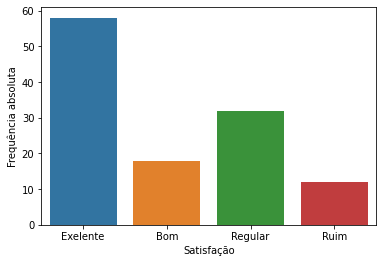

In [521]:
#Gráfico barra vertical
fig, ax = plt.subplots()
ax = sns.barplot(x="Satisfação", y="Frequência absoluta", data=dados)

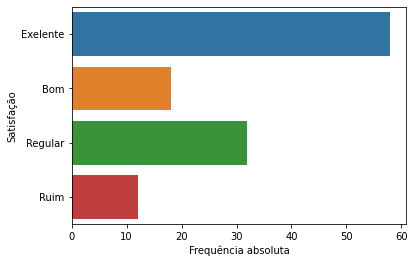

In [522]:
#Gráfico barra horizontal
fig, ax = plt.subplots()
ax = sns.barplot(y="Satisfação", x="Frequência absoluta", data=dados, )

#### Gráficos de Pizza ou de Setores

In [573]:
dados = pd.DataFrame([["PMDB", 18],
                      ["REDE", 22],
                      ["PDT", 12],
                      ["PSDB", 25],
                      ["PC do B", 8],
                      ["PV", 5],
                      ["Outros", 10]])

dados.columns = ["Partido", "Porcentagem"]
dados = dados.sort_values("Porcentagem", ascending= False)
dados

,Partido,Porcentagem
3,PSDB,25
1,REDE,22
0,PMDB,18
2,PDT,12
6,Outros,10
4,PC do B,8
5,PV,5


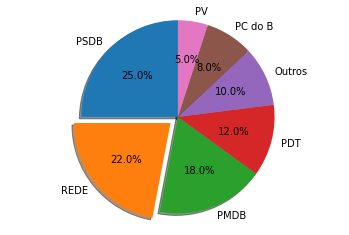

In [594]:
#Gráfico barra horizontal
fig, ax = plt.subplots()
ax.pie(dados["Porcentagem"], labels = dados["Partido"], autopct="%1.1f%%",
             shadow = True, explode = (0,0.1,0,0,0,0,0), startangle=90)
ax.axis("equal")
plt.show()

### Diagrama de pareto

In [582]:
from matplotlib.ticker import PercentFormatter

In [580]:
dados["Porcentagem Acumulada"] = dados["Porcentagem"].cumsum()
dados

,Partido,Porcentagem,Porcentagem Acumulada
3,PSDB,25,25
1,REDE,22,47
0,PMDB,18,65
2,PDT,12,77
6,Outros,10,87
4,PC do B,8,95
5,PV,5,100


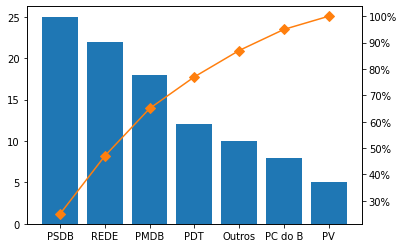

In [595]:
fig, ax = plt.subplots()

ax.bar(dados["Partido"], dados["Porcentagem"],)
ax2 = ax.twinx()

ax2.plot(dados["Partido"], dados["Porcentagem Acumulada"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y")
ax2.tick_params(axis="y")
plt.show()

### Gráfico de linhas